In [45]:
!pip install kneed

  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata


In [78]:
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
import umap
import numpy as np
import kneed

In [112]:
df = pd.read_csv('Country-data.csv')

In [80]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [81]:
num_cols = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

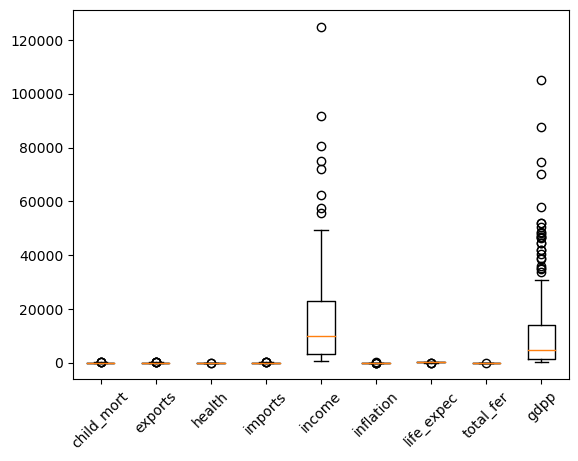

In [82]:
plt.boxplot(df[num_cols])
plt.xticks((range(1,len(num_cols)+1,1)),num_cols,rotation = 45)
plt.show()

In [83]:
df_orig= df.copy()

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [127]:
df[num_cols] = scaler.fit_transform(df[num_cols])

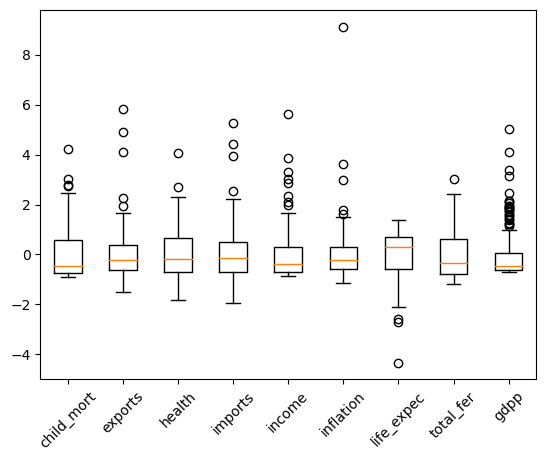

In [128]:
plt.boxplot(df[num_cols])
plt.xticks((range(1,len(num_cols)+1,1)),num_cols,rotation = 45)
plt.show()

In [129]:
from sklearn.decomposition import PCA

In [130]:
pca9 = PCA(n_components=len(df_stnd.columns)-1)
pca9.fit( df_stnd[num_cols])

PCA(n_components=9)

In [131]:
knee = kneed.KneeLocator(range(1,pca9.n_components_+1),np.cumsum(pca9.explained_variance_)/np.cumsum(pca9.explained_variance_)[-1],curve = 'concave',direction= 'increasing')

In [132]:
knee.all_elbows

{5}

In [133]:
np.cumsum(pca9.explained_variance_)/np.cumsum(pca9.explained_variance_)[-1]

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

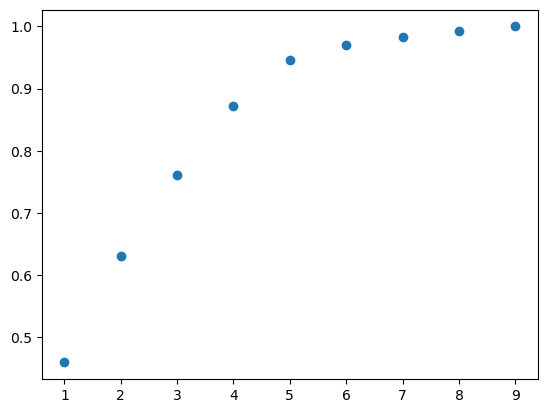

In [134]:
plt.scatter(x=range(1,pca9.n_components_+1),y=np.cumsum(pca9.explained_variance_)/np.cumsum(pca9.explained_variance_)[-1])

In [196]:
pca2 = PCA(n_components=2)

In [197]:
cnts_2d = pca2.fit_transform(df[num_cols])

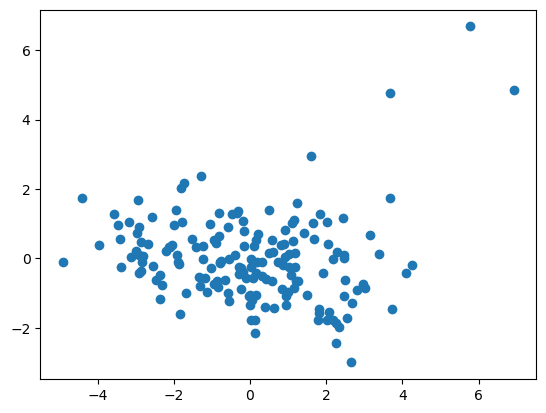

In [198]:
plt.scatter(cnts_2d[:,0],cnts_2d[:,1])

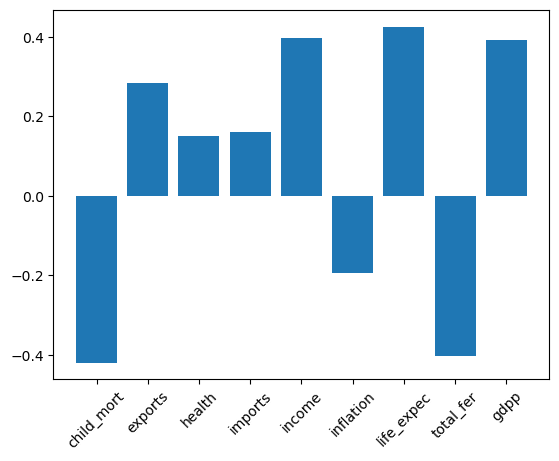

In [146]:
plt.bar(x=num_cols, height = pca9.components_[0])
plt.xticks(rotation=45)
plt.show()

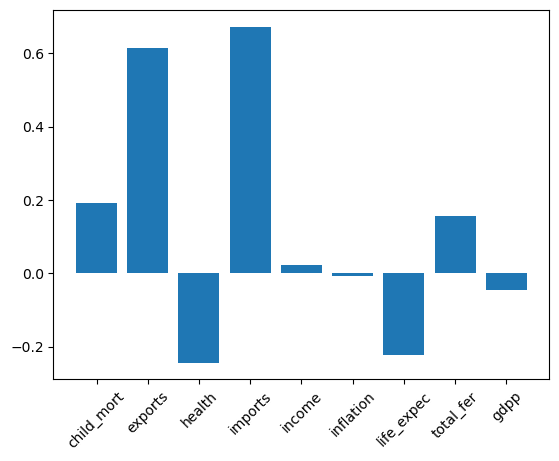

In [147]:
plt.bar(x=num_cols, height = pca9.components_[1])
plt.xticks(rotation=45)
plt.show()

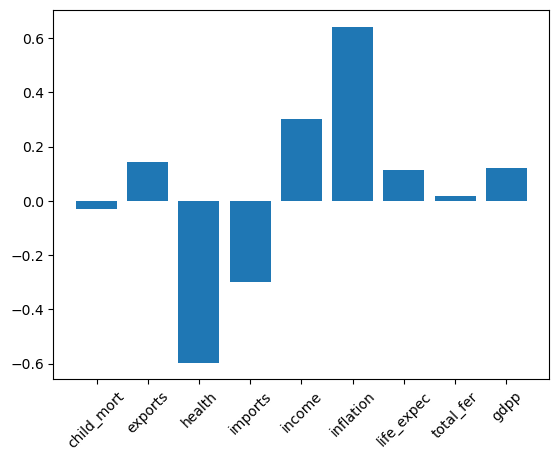

In [148]:
plt.bar(x=num_cols, height = pca9.components_[2])
plt.xticks(rotation=45)
plt.show()

In [150]:
pca4 = PCA(n_components=4)
cnts_4d = pca4.fit_transform(df[num_cols])

In [157]:
from sklearn.cluster import HDBSCAN

In [158]:
clus = HDBSCAN()

In [159]:
clusters = clus.fit_predict(cnts_4d)

In [160]:
clusters
#fucking dogshit

array([ 0,  0,  0, -1,  0, -1,  0,  1,  1,  0,  0, -1,  0,  0,  0, -1,  0,
        0,  0,  0, -1, -1, -1, -1,  0,  0, -1,  0,  0,  1,  0, -1, -1,  0,
        0,  0,  0, -1, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1, -1,
        0,  0,  1,  1, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0, -1,  0,
       -1,  0,  0,  0, -1, -1,  0,  1,  0,  1,  0, -1,  0, -1, -1,  0,  0,
        0,  0, -1, -1, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1,  0, -1,
       -1, -1,  0,  0,  0, -1, -1,  0, -1,  1,  0, -1, -1, -1, -1,  0,  0,
        0,  0,  0,  1, -1,  0,  0, -1,  0, -1,  0,  0, -1, -1, -1,  0, -1,
       -1, -1, -1,  1, -1,  0, -1,  0,  1, -1,  0,  0, -1, -1, -1,  0,  0,
        0, -1,  0,  0, -1,  1, -1,  0,  0,  0, -1,  0, -1,  0],
      dtype=int64)

In [162]:
u4 = umap.UMAP(n_components=4)
cnts_4d = u4.fit_transform(df[num_cols])

In [163]:
clus = HDBSCAN()
clusters = clus.fit_predict(cnts_4d)
clusters

array([ 1, -1,  5,  1,  7,  6,  3,  0,  0,  5, -1,  2,  5,  7, -1,  0,  4,
        1,  4,  5,  7,  4,  6,  2,  7,  1,  1,  4,  1,  0, -1,  1,  1, -1,
        6,  6,  1,  1,  1, -1,  1, -1,  2,  8,  0, -1,  6,  5,  3,  1,  1,
        8,  4,  0,  0,  1,  1,  7,  0,  1,  0,  3,  5,  1,  1,  4,  1,  8,
        0,  5,  5,  6,  1,  0,  0,  0,  3,  0,  4,  5,  1, -1,  2,  4,  1,
       -1,  7, -1, -1,  2,  8,  0,  7,  1,  1,  8,  8,  1,  0,  1,  7,  4,
        7, -1,  7,  3,  1,  5, -1,  5,  0,  0,  1,  1,  0,  2,  1,  8, -1,
        6,  5,  7,  0,  2,  3,  5,  1, -1,  2,  1,  7, -1,  1, -1,  8, -1,
        4, -1, -1,  0,  5,  3,  1, -1,  0,  0, -1,  1,  8,  1,  1,  3, -1,
        6,  4,  1, -1,  2,  0,  0,  6,  5,  4, -1, -1,  1,  1],
      dtype=int64)

In [164]:
df.country.groupby(clusters).apply(list)

-1    [Albania, Bahamas, Belarus, Cape Verde, Chile,...
 0    [Australia, Austria, Belgium, Canada, Denmark,...
 1    [Afghanistan, Angola, Benin, Burkina Faso, Bur...
 2    [Bahrain, Brunei, Cyprus, Kuwait, Libya, Oman,...
 3    [Armenia, El Salvador, Grenada, Jamaica, Moroc...
 4    [Belize, Bhutan, Botswana, Cambodia, Fiji, Guy...
 5    [Algeria, Azerbaijan, Bangladesh, Bolivia, Egy...
 6    [Argentina, Brazil, China, Colombia, Ecuador, ...
 7    [Antigua and Barbuda, Barbados, Bosnia and Her...
 8    [Czech Republic, Estonia, Hungary, Lithuania, ...
Name: country, dtype: object

In [177]:
from depth.multivariate import halfspace

In [186]:
import seaborn as sns

In [190]:
df['clst_hdb'] = clusters

C:\Users\zsand\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


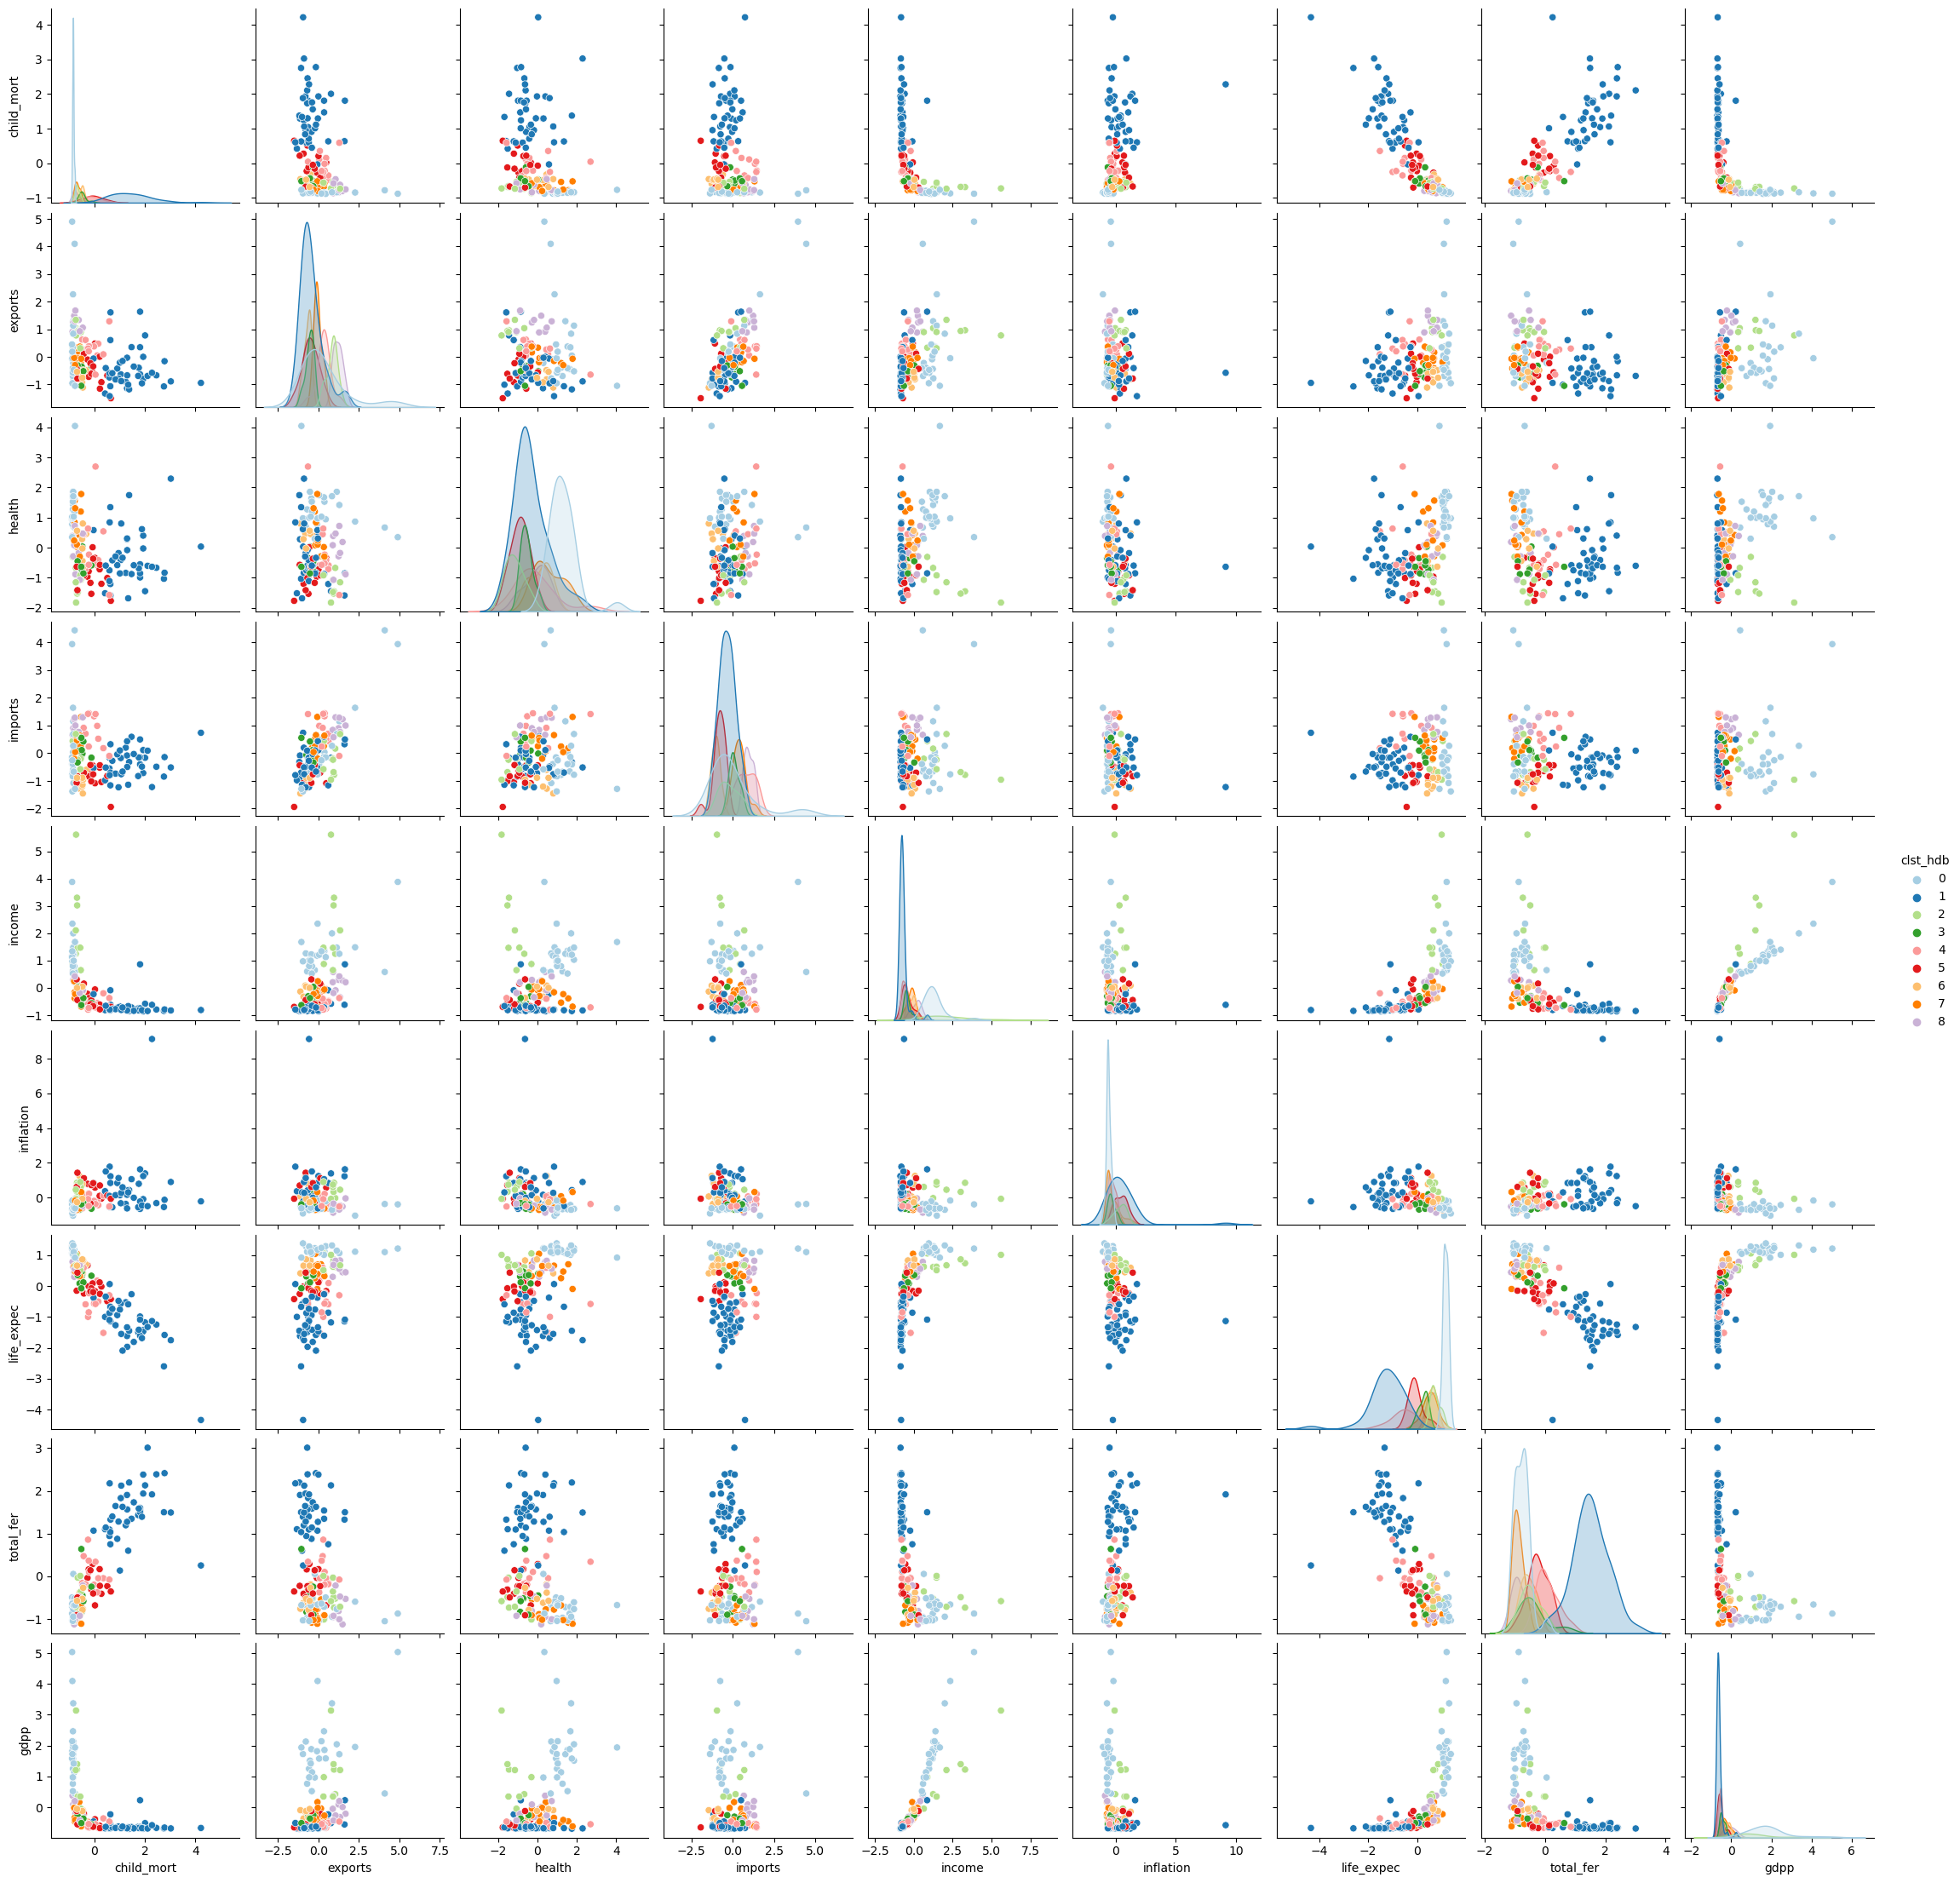

In [200]:
sns.pairplot(df[num_cols+['clst_hdb']][df['clst_hdb']!=-1], vars = num_cols, hue = 'clst_hdb',palette = "Paired" )